<a href="https://colab.research.google.com/github/0AlphaZero0/Data_Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="head"></a>
# **Data Visualization**

This notebook will help to remember and access quickly charts for data sciences with multiple tools such as *`numpy`*, *`matplotlib`*, *`ggplot`*, *`seaborn`*, *`pandas`*

<a id="modules_data"></a>
## ***Modules and Data***

<a id="imports"></a>
### *Import Modules*

In [ ]:
%matplotlib inline
import textwrap
import requests
import datetime
import json
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches # needed for waffle Charts
from wordcloud import WordCloud, STOPWORDS
import folium
import plotly
import plotly.graph_objects as go
import plotly.express as px
import copy

<a id="loading_data"></a>
### *Loading data*

<a id="loading_data_canada"></a>
#### *Canada Immigration dataset*

<a id="loading_data_canada_loading"></a>
##### *Loading Canada immigration dataset*

In [ ]:
# Load data
%%time
import pandas as pd
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
# Rename columns with better names
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df['Total'] = df.sum(axis=1)
# Set Country as index use df.reset_index() to cancel
df.set_index('Country', inplace=True)
# Avoid confusion between column indice and years
df.columns = list(map(str, df.columns))

df.head()

CPU times: user 503 ms, sys: 4.38 ms, total: 507 ms
Wall time: 891 ms


<a id="loading_data_canada_overview"></a>
##### *Overview of Canada immigration dataset*

In [ ]:
df.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,35930.984615
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,92040.242971
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2719.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,3718.500000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,8695.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,24973.500000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,699242.000000


In [ ]:
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,2749


<a id="loading_data_airline"></a>
#### *Reporting Carrier On-Time Performance Dataset - Airline dataset*

<a id="loading_data_airline_loading"></a>
##### *Loading airline dataset*

In [ ]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv(
    filepath_or_buffer='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
    encoding="ISO-8859-1",
    dtype={
        'Div1Airport': str,
        'Div1TailNum': str, 
        'Div2Airport': str,
        'Div2TailNum': str})

airline_sample = airline_data.sample(n=100,random_state=42)

<a id="loading_data_airline_overview"></a>
##### *Overview of airline dataset*

In [ ]:
airline_data.describe()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,...,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,26994.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,26993.000000,27000.000000,27000.000000,26557.000000,26557.000000,26557.000000,26557.000000,26557.000000,21451.000000,21450.000000,21423.00000,21425.000000,27000.000000,26517.000000,26498.000000,26498.000000,26498.000000,26498.000000,27000.000000,27000.000000,26996.000000,26498.000000,21406.000000,27000.0,...,22.000000,19.000000,19.000000,22.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000,19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.987625e+05,2004.304926,2.505889,6.518667,15.714370,3.939407,19923.175222,1727.947963,12740.372481,1.274039e+06,31740.002407,26.858191,55.378889,12693.318296,1.269334e+06,31719.710741,26.849146,55.389407,1331.850815,1343.463155,8.531009,10.427119,0.171330,0.062432,15.817864,1362.781865,1480.05228,6.677480,1490.474519,1485.536297,6.174541,11.791267,0.199751,-0.072987,0.016556,0.002037,126.467291,124.312175,105.143651,1.0,...,0.863636,355.789474,211.315789,34.000000,12785.521739,1.278555e+06,1686.130435,30.869565,26.565217,1733.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.767890e+05,9.189835,1.114589,3.444192,8.816548,1.986853,367.912667,1658.882759,1543.896695,1.543894e+05,1309.809113,16.446383,26.630034,1533.394629,1.533392e+05,1297.739569,16.460605,26.541918,475.998453,480.514476,32.435614,31.691435,0.376804,1.797457,10.217434,483.176650,503.53763,4.933763,495.035476,505.569232,34.379798,31.474675,0.399821,1.989659,0.127601,0.045088,70.486325,70.350499,68.720911,0.0,...,0.351250,76.718518,89.827027,109.192709,1414.312421,1.414313e+05,483.844857,29.056848,30.486698,590.626682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.480000e+02,1987.000000,1.000000,1.000000,1.000000,1.000000,19386.000000,1.000000,10135.000000,1.013501e+06,30070.000000,1.000000,1.000000,10135.000000,1.013501e+06,30070.000000,1.000000,1.000000,0.000000,1.000000,-23.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,-66.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,20.000000,13.000000,2.000000,1.0,...,0.000000,197.000000,109.000000,0.000000,10185.000000,1.018502e+06,640.000000,2.000000,2.000000,202.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.029945e+05,1997.000000,2.000000,4.000000,8.000000,2.000000,19704.000000,528.000000,11292.000000,1.129202e+06,30647.000000,12.000000,34.000000,11292.000000,1.129202e+06,30647.000000,12.000000,34.000000,929.000000,932.

In [ ]:
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,...,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,N785AS,584,11884,1188401,31884,GEG,"Spokane, WA",WA,53.0,Washington,93,14747,1474702,30559,SEA,"Seattle, WA",WA,53.0,Washington,93,1330,1330.0,0.0,0.0,0.0,0.0,1300-1359,8.0,1338.0,1415.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,N24103,4132,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,14524,1452401,34524,RIC,"Richmond, VA",VA,51.0,Virginia,38,1301,1255.0,-6.0,0.0,0.0,-1.0,1300-1359,9.0,1304.0,1358.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,NaN,2206,14108,1410801,34108,PIA,"Peoria, IL",IL,17.0,Illinois,41,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,1650,1723.0,33.0,33.0,1.0,2.0,1600-1659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,NaN,1207,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,14107,1410701,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,1245,1309.0,24.0,24.0,1.0,1.0,1200-1259,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,N827UA,576,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19.0,Iowa,61,11292,1129202,30325,DEN,"Denver, CO",CO,8.0,Colorado,82,755,746.0,-9.0,0.0,0.0,-1.0,0700-0759,8.0,754.0,836.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="matplotlib"></a>
## ***Matplotlib***

<a id="matplotlib_import"></a>
### *Import Matplotlib*

In [ ]:
# Import library
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches # needed for waffle Charts

print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


<a id="matplotlib_optional"></a>
##### *Optional (style)*

In [ ]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<a id="matplotlib_plots"></a>
### *Plots with Matplotlib*

There are 10 kind of plots with the method `plot()` :

*   `line` for [line plots](#matplotlib_lineplot)
*   `bar` for [vertical bar plots](#matplotlib_barplot)
*   `barh` for [horizontal bar plots](#matplotlib_horizontalbarplot)
*   `hist` for [histogram](#matplotlib_histogram)
*   `box` for [boxplot](#matplotlib_boxplot)
*   `kde` or `density` for [density plots](#matplotlib_densityplot)
*   `area` for [area plots](#matplotlib_areaplot)
*   `pie` for [pie plots](#matplotlib_pieplot)
*   `scatter` for [scatter plots](#matplotlib_scatterplot)
*   `hexbin` for [hexbin plot](#matplotlib_hexbinplot)

If we want a [Waffle chart](#matplotlib_wafflechart), *`matplotlib`* doesn't provide a method and we have to create it through our own function.

<a id="matplotlib_lineplot"></a>
#### *Line Plots - `line`*

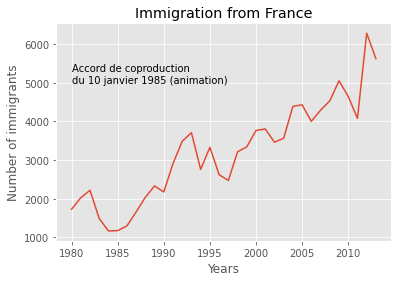

In [ ]:
# Line PLots

min_year, max_year = 1980, 2014 # 1980, 2014
country = "France"

years = list(map(str,range(min_year,max_year)))

country_df = df.loc[country,years]
# Map year's strings to corresponding integer
country_df.index = country_df.index.map(int)
country_df.plot(kind='line')
plt.title('Immigration from '+country)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(1980,5000,'Accord de coproduction\ndu 10 janvier 1985 (animation)')

plt.show()

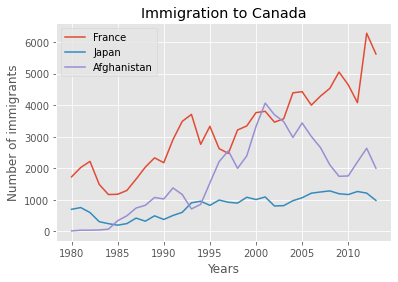

In [ ]:
# Multiple Lines

min_year, max_year = 1980, 2014 # 1980, 2014
countries = ["France","Japan","Afghanistan"]

years = list(map(str,range(min_year,max_year)))

for country in countries:
    country_df = df.loc[country,years]
    country_df.index = country_df.index.map(int)
    country_df.plot(
        kind='line',
        label=country
    )
plt.title('Immigration to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend()

plt.show()

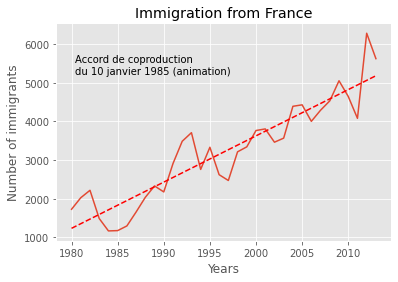

In [ ]:
# Line PLots with trend line

min_year, max_year = 1980, 2014 # 1980, 2014
country = "France"

years = list(map(str,range(min_year,max_year)))

country_df = df.loc[country,years]
# Map year's strings to corresponding integer
country_df.index = country_df.index.map(int)
country_df.plot(kind='line')

# Compute a trendline thanks to numpy
z = np.polyfit(country_df.index,list(country_df),1)
p = np.poly1d(z)
plt.plot(country_df.index,p(country_df.index),"r--")

plt.title('Immigration from '+country)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

axes = plt.gca()
y_min, y_max = axes.get_ylim()
x_min, x_max = axes.get_xlim()

plt.text(x_min+0.001*x_min,0.8*y_max,'Accord de coproduction\ndu 10 janvier 1985 (animation)')

plt.show()

Trendline equations :

France trendline equation is y = 119.55309396485728*x + (-235479.19327730816)
Japan trendline equation is y = 28.331398013750483*x + (-55748.72436974695)
Afghanistan trendline equation is y = 93.20473644002966*x + (-184358.579831931)




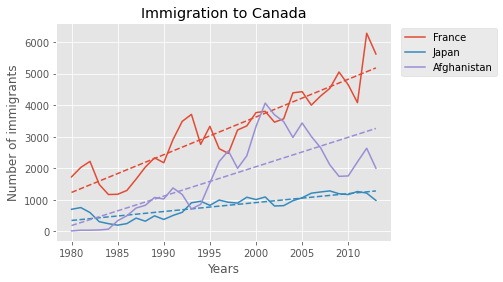

In [ ]:
# Multiple Lines with their corresponding trend lines

min_year, max_year = 1980, 2014 # 1980, 2014
countries = ["France","Japan","Afghanistan"]

years = list(map(str,range(min_year,max_year)))

print("Trendline equations :\n")
for country in countries:
    country_df = df.loc[country,years]
    country_df.index = country_df.index.map(int)
    ax = plt.gca()
    color=next(ax._get_lines.prop_cycler)['color'] # loop through matplotlib colors, helps matching trend lines to their corresponding lines
    country_df.plot(
        kind='line',
        label=country,
        color=color
    )
    # Compute a trendline thanks to numpy
    z = np.polyfit(country_df.index,list(country_df),1)
    p = np.poly1d(z)
    plt.plot(country_df.index,p(country_df.index),color=color,linestyle='dashed')
    print(country+" trendline equation is "+"y = "+str(z[0])+"*x + ("+str(z[1])+")")
print("\n")
plt.title('Immigration to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(loc="upper right", bbox_to_anchor=(1.33, 1))

plt.show()

<a id="matplotlib_barplot"></a>
#### *Bar plots - `bar`*

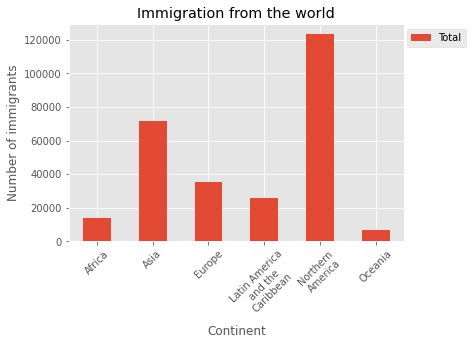

In [ ]:
# Bar plot

continent_df = pd.pivot_table(df,'Total','Continent')

continent_df.plot(kind='bar')

plt.title('Immigration from the world')
plt.ylabel('Number of immigrants')
plt.xlabel('Continent')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Split tick label that are longer than 15
plt.xticks(
    ticks=range(len(list(continent_df.index))),
    labels=[x if len(x)<15 else "\n".join(textwrap.wrap(x,15)) for x in list(continent_df.index)],
    rotation=45)

plt.show()

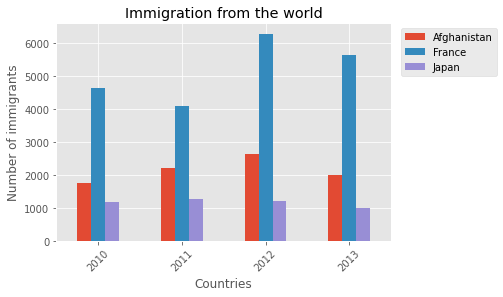

In [ ]:
# Multiple Bars

min_year, max_year = 2010, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))
countries = ["Afghanistan","France","Japan"]

country_df = df.loc[countries,years].transpose()

country_df.plot(kind='bar')

plt.title('Immigration from the world')
plt.ylabel('Number of immigrants')
plt.xlabel('Countries')
plt.legend(loc="upper right", bbox_to_anchor=(1.33, 1))

# Split tick label that are longer than 15
plt.xticks(
    ticks=range(len(list(country_df.index))),
    labels=[x if len(x)<15 else "\n".join(textwrap.wrap(x,15)) for x in list(country_df.index)],
    rotation=45)

plt.show()

<a id="matplotlib_horizontalbarplot"></a>
#### *Horizontal Bar Plots - `barh`*

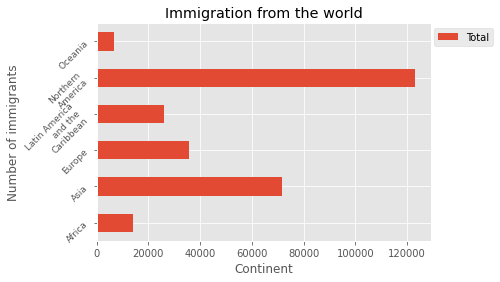

In [ ]:
# Horizontal Bar Plot

continent_df = pd.pivot_table(df,'Total','Continent')

continent_df.plot(kind='barh')

plt.title('Immigration from the world')
plt.ylabel('Number of immigrants')
plt.xlabel('Continent')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Split tick label that are longer than 15
plt.yticks(
    ticks=range(len(list(continent_df.index))),
    labels=[x if len(x)<15 else "\n".join(textwrap.wrap(x,15)) for x in list(continent_df.index)],
    rotation=45,
    fontsize=9)

plt.show()

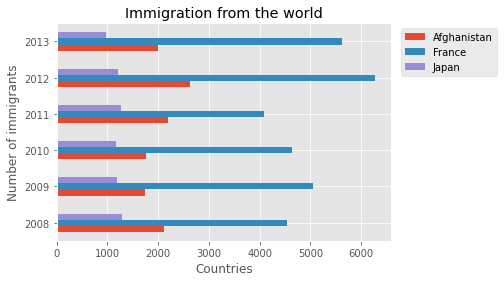

In [ ]:
# Multiple Horizontal Bars

min_year, max_year = 2008, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))
countries = ["Afghanistan","France","Japan"]

country_df = df.loc[countries,years].transpose()

country_df.plot(kind='barh')

plt.title('Immigration from the world')
plt.ylabel('Number of immigrants')
plt.xlabel('Countries')
plt.legend(loc="upper right", bbox_to_anchor=(1.33, 1))

plt.show()

<a id="matplotlib_histogram"></a>
#### *Histograms - `hist`*

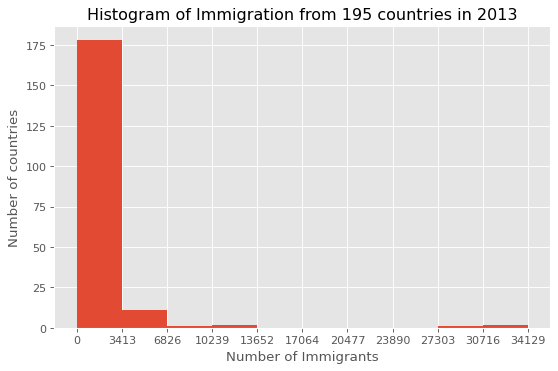

In [ ]:
# Histogram Plot

year = '2013'

figure(figsize=(8,5),dpi=80)

# Thanks to this line the xticks labels will be easier to read
count, bin_edges = np.histogram(df[year])

df[year].plot(kind='hist', xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in '+year)
plt.ylabel('Number of countries')
plt.xlabel('Number of Immigrants')

plt.show()

<Figure size 800x480 with 0 Axes>

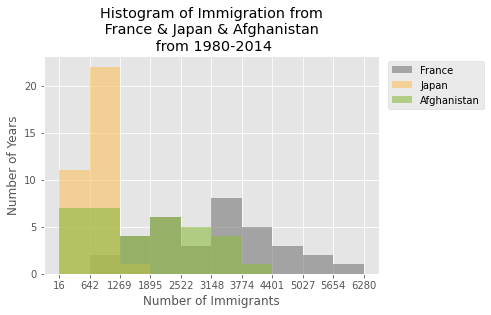

In [ ]:
# Multiple Overlying Histograms Plot

min_year, max_year = 1980, 2014 # 1980, 2014
countries = ["France","Japan","Afghanistan"]

years = list(map(str,range(min_year,max_year)))

df_countries = df.loc[countries, years].transpose()

# Thanks to this line the xticks labels will be easier to read
count, bin_edges = np.histogram(df_countries)
figure(figsize=(10,6),dpi=80)
df_countries.plot(
    kind='hist',
    xticks=bin_edges,
    alpha=0.6,
    color=[next(ax._get_lines.prop_cycler)['color'] for col in range(len(countries))])


plt.title('Histogram of Immigration from\n '+' & '.join(countries)+' \n from '+str(min_year)+'-'+str(max_year))
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.legend(loc="upper right", bbox_to_anchor=(1.33, 1))

plt.show()

<a id="matplotlib_boxplot"></a>
#### *Box plots - `box`*

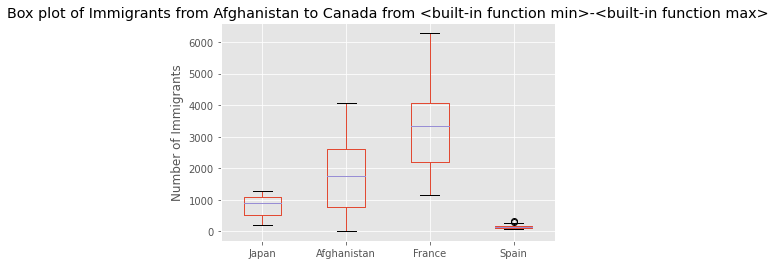

In [ ]:
# Box Plots

countries = ["Japan","Afghanistan","France","Spain"]
min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

country_df = df.loc[countries,years].transpose()
country_df.plot(kind='box')

plt.title("Box plot of Immigrants from "+country+" to Canada from "+str(min)+"-"+str(max))
plt.ylabel("Number of Immigrants")

plt.show()

<a id="matplotlib_densityplot"></a>
#### *Density plots - `kde` or `density`*

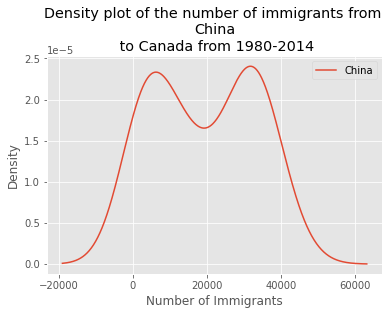

In [ ]:
# Density Plot

country = "China"
min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

country_df = df.loc[country,years]
country_df.plot(kind='density')

plt.title("Density plot of the number of immigrants from \n"+country+"\n to Canada from "+str(min_year)+"-"+str(max_year))
plt.xlabel('Number of Immigrants')
plt.legend()

# Set the beginning of the x axis to 0
# axes = plt.gca()
# axes.set_xlim(xmin=0)

plt.show()

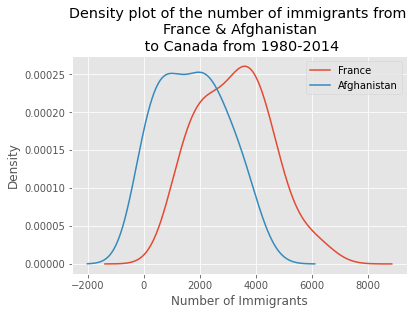

In [ ]:
# Multiple Density Plot

countries = ["France","Afghanistan"]
min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

for country in countries:
    country_df = df.loc[country,years]
    country_df.plot(kind='density')

plt.title("Density plot of the number of immigrants from \n"+" & ".join(countries)+"\n to Canada from "+str(min_year)+"-"+str(max_year))
plt.xlabel('Number of Immigrants')
plt.legend()

# Set the beginning of the x axis to 0
# axes = plt.gca()
# axes.set_xlim(xmin=0)

plt.show()

<a id="matplotlib_areaplot"></a>
#### *Area plots - `area`*

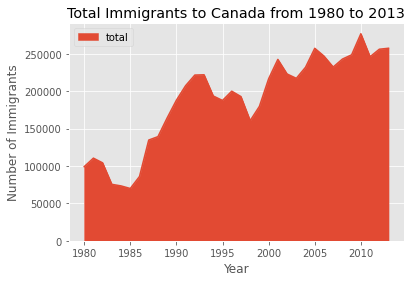

In [ ]:
# Area Plots

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

df_total = pd.DataFrame(df[years].sum(axis=0)) # we can use the sum() method to get the total population per year
df_total.index = map(int,df_total.index) # change the years to type int
df_total.reset_index(inplace=True) # reset the index to put in back in as a column in the df_total dataframe
df_total.columns = ['year','total'] # Rename columns

df_total.plot(kind='area',x='year',y='total')

plt.title("Total Immigrants to Canada from 1980 to 2013")
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

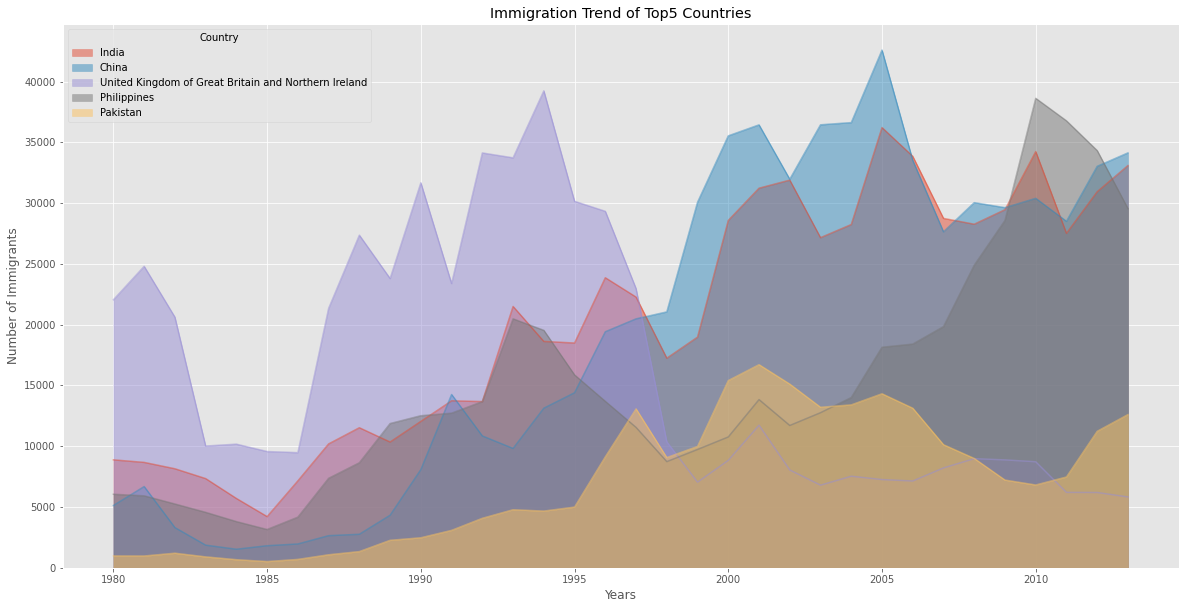

In [ ]:
# Area Plots

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

df_top5 = df.sort_values(['Total'], ascending = False, axis = 0, inplace = False)
df_top5 = df_top5.head()
df_top5 = df_top5[years].transpose()
df_top5.index = df_top5.index.map(int)#change the index value to type integer

df_top5.plot(kind = 'area',stacked=False, figsize = (20,10),#pass a tuple (x,y) size
            )
plt.title('Immigration Trend of Top5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

<a id="matplotlib_pieplot"></a>
#### *Pie plots - `pie`*

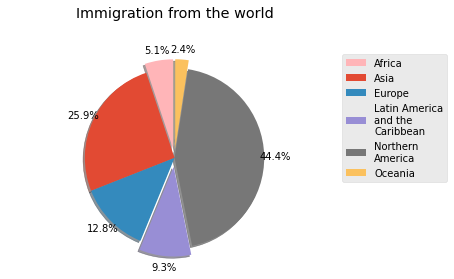

In [ ]:
# Pie Plots

continent_df = pd.pivot_table(df,'Total','Continent')

continent_df['Total'].plot(
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
    colors=[next(ax._get_lines.prop_cycler)['color'] for i in range(len(continent_df['Total']))],
    explode=[0.1 if x in sorted(range(len(continent_df['Total'])), key = lambda sub: continent_df['Total'][sub])[:3] else 0 for x in range(len(continent_df['Total']))]
)
# The explode list is a list which corresponds to the ratio applied to each continent, here the lowest 3 will have a ratio of 0.1 resulting in a list like this : [0.1, 0, 0, 0, 0.1, 0.1]

plt.title('Immigration from the world',y=1.12)
plt.ylabel('')
plt.axis('equal')
plt.legend(
    labels=[x if len(x)<15 else "\n".join(textwrap.wrap(x,15)) for x in list(continent_df.index)],
    loc="upper right",
    bbox_to_anchor=(1.33, 1))


plt.show()

<a id="matplotlib_scatterplot"></a>
#### *Scatter plots - `scatter`*

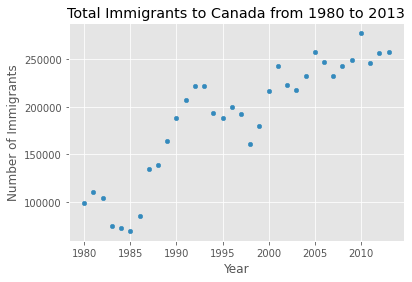

In [ ]:
# Scatter Plot

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

df_total = pd.DataFrame(df[years].sum(axis=0)) # we can use the sum() method to get the total population per year
df_total.index = map(int,df_total.index) # change the years to type int
df_total.reset_index(inplace=True) # reset the index to put in back in as a column in the df_total dataframe
df_total.columns = ['year','total'] # Rename columns

df_total.plot(kind='scatter',x='year',y='total')

plt.title("Total Immigrants to Canada from 1980 to 2013")
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

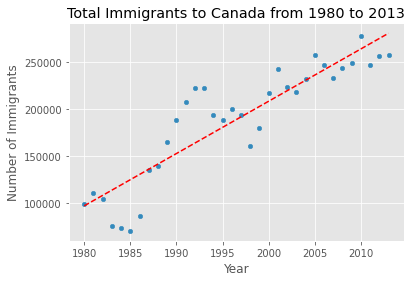

In [ ]:
# Scatter Plot with trend line

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

df_total = pd.DataFrame(df[years].sum(axis=0)) # we can use the sum() method to get the total population per year
df_total.index = map(int,df_total.index) # change the years to type int
df_total.reset_index(inplace=True) # reset the index to put in back in as a column in the df_total dataframe
df_total.columns = ['year','total'] # Rename columns

df_total.plot(kind='scatter',x='year',y='total')

# Compute a trendline thanks to numpy
z = np.polyfit(df_total['year'],df_total['total'],1)
p = np.poly1d(z)
plt.plot(df_total['year'],p(df_total['year']),"r--")

plt.title("Total Immigrants to Canada from 1980 to 2013")
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

<a id="matplotlib_hexbinplot"></a>
#### *Hexbin plots - `hexbin`*

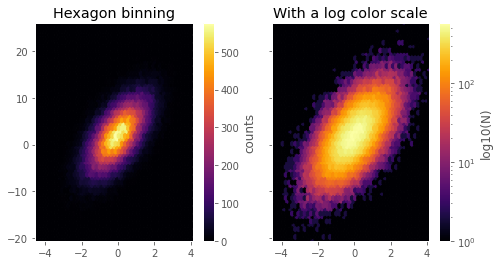

In [ ]:
# Hexbin Plot

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

<a id="matplotlib_wafflechart"></a>
#### *Waffle chart*

Total number of tiles is 400
France: 215
Japan: 58
Afghanistan: 127


<Figure size 432x288 with 0 Axes>

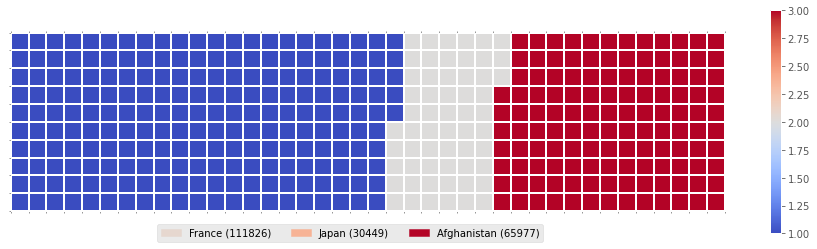

In [ ]:
# Waffle Chart

width = 40
height = 10
countries = ["France","Japan","Afghanistan"]

df_waffle = df.loc[countries, :]
total_values = df_waffle['Total'].sum()
category_proportions = df_waffle['Total'] / total_values

categories = df_waffle.index.values # categories
values = df_waffle['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

def create_waffle_chart(categories, values, height, width, colormap, dataframe, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dataframe.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

create_waffle_chart(categories, values, height, width, colormap, df_waffle)


<a id="WordCloud"></a>
## ***WordCloud***

Bla bla

In [ ]:
# Import library
from wordcloud import WordCloud, STOPWORDS
import wordcloud

print('WordCloud version: ', wordcloud.__version__)

WordCloud version:  1.5.0


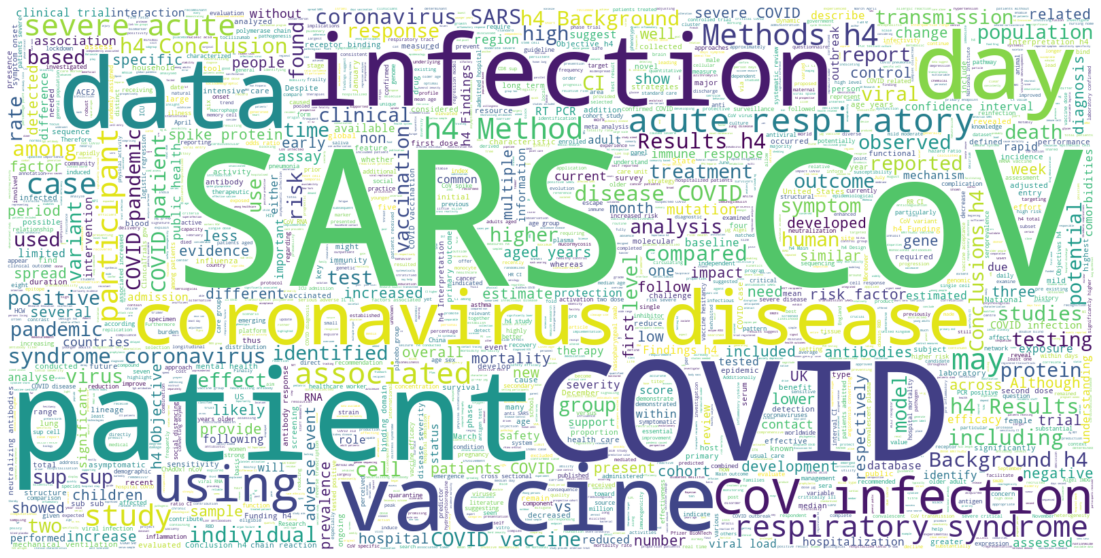


893 publications from 2021 has been used for this word cloud to be made.


In [ ]:
# This code build a word cloud from the ~1000 most cited papers of the current year within EPMC

url = "https://www.ebi.ac.uk/europepmc/webservices/rest/searchPOST"
year = datetime.datetime.now().year
data = {
    "query":"((HAS_FT:Y AND OPEN_ACCESS:Y)) AND (FIRST_PDATE:"+str(year)+")",
    "resultType":"core",
    "sort":"CITED desc",
    "format":"JSON",
    "pageSize":1000
}

response = json.loads(requests.post(url=url,data=data).text)

ABSTRACTS = ""
publications_nb = 0
for publi in response["resultList"]["result"]:
    if "abstractText" in publi:
        ABSTRACTS = ABSTRACTS + publi["abstractText"]
        publications_nb += 1

stop_words = set(STOPWORDS)

epmc_publi_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words,
    width=1600,
    height=800
)

epmc_publi_wc.generate(ABSTRACTS)

figure(figsize=(20,10))

plt.imshow(epmc_publi_wc,interpolation='bilinear')
plt.axis('off')

plt.show()

print("\n"+str(publications_nb)+" publications from "+str(year)+" has been used for this word cloud to be made.")

<a id="seaborn"></a>
## ***Seaborn***

Bla Bla

In [ ]:
# Import library
import seaborn as sns

print('Seaborn version: ', sns.__version__)

Seaborn version:  0.11.1


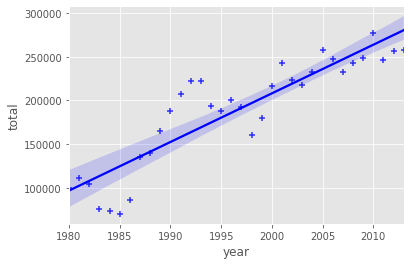

In [ ]:
# Regression plot / Scatter plot with trend line

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))

df_total = pd.DataFrame(df[years].sum(axis=0)) # we can use the sum() method to get the total population per year
df_total.index = map(int,df_total.index) # change the years to type int
df_total.reset_index(inplace=True) # reset the index to put in back in as a column in the df_total dataframe
df_total.columns = ['year','total'] # Rename columns

ax = sns.regplot(
    x='year',
    y='total',
    data=df_total,
    color='blue',
    marker='+')

<a id="folium"></a>
## ***Folium***

In [ ]:
# Import libraries
import folium

<a id="folium_map"></a>
#### *Folium Maps*

In [ ]:
# define world map
world_map = folium.Map(
    location=[56.130,-106.35],
    zoom_start=4,
    tiles='Stamen Terrain'
)

# display world map
world_map

In [ ]:
# define world map
world_map = folium.Map(
    location=[56.130,-106.35],
    zoom_start=4,
)

## add a red marker to Ontario

# create a feature group
ontario = folium.map.FeatureGroup()
# style the feature group
ontario.add_child(
    folium.vector_layers.CircleMarker(
        [51.25,-85.32],
        radius=5,
        color='red',
        fill_color='Red'
    )
)
# add feature group to map
world_map.add_child(ontario)
# label marker
folium.Marker(
    location=[51.25,-85.32],
    popup='Ontario',
).add_to(world_map)


# display world map
world_map

<a id="folium_choroplethmap"></a>
#### *Choropleth Maps*

In [ ]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))
# add total column
df_can['Total'] = df_can.sum(axis=1)

## geojson file
world_geo = r'world_countries.json'
geojson_file=json.loads(requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json').text)
with open(world_geo, 'w') as outfile:
    json.dump(geojson_file, outfile)

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)
world_map

<a id="plotly"></a>
## ***Plotly***

*   [Plotly python](https://plotly.com/python/getting-started/)
*   [Plotly graph objects with example](https://plotly.com/python/graph-objects/)
*   [API reference](https://plotly.com/python-api-reference/)

Here are additional useful resources:

*   [Plotly cheatsheet](https://images.plot.ly/plotly-documentation/images/plotly_js_cheat_sheet.pdf)
*   [Plotly community](https://community.plotly.com/c/api/5)
*   [Related blogs](https://plotlygraphs.medium.com/)
*   [Open source datasets](https://developer.ibm.com/exchanges/data/)

In [ ]:
# Import libraries
import plotly
import plotly.graph_objects as go
import plotly.express as px

print('Plotly version: ', plotly.__version__) 

Plotly version:  5.3.0


<a id="plotly_lineplot"></a>
#### *Line Plots*

In [ ]:
# Line Plot

min_year, max_year = 1980, 2014 # 1980, 2014
country = "France"

years = list(map(str,range(min_year,max_year)))

country_df = df.loc[country,years]
# Map year's strings to corresponding integer
country_df.index = country_df.index.map(int)

fig = go.Figure(data=go.Scatter(
    x=country_df.index.values,
    y=country_df))
fig.update_layout(
    title='Immigration to Canada from '+country+' from '+str(min_year)+" to "+str(max_year),
    xaxis_title='Years',
    yaxis_title='Number of Immigrants')
fig.show()

In [ ]:
# Line Plot with plotly.express (as px)

min_year, max_year = 1980, 2014 # 1980, 2014
country = "France"

years = list(map(str,range(min_year,max_year)))

country_df = df.loc[country,years]
# Map year's strings to corresponding integer
country_df.index = country_df.index.map(int)

fig = px.line(
    x=country_df.index.values,
    y=country_df,
    title='Immigration to Canada from '+country+' from '+str(min_year)+" to "+str(max_year),
    labels=dict(x='Years',y='Number of Immigrants')
)

fig.show()

In [ ]:
# Multiple Line Plot with plotly.express (as px)

min_year, max_year = 1980, 2014 # 1980, 2014
countries = ["France","Japan","Afghanistan"]

years = list(map(str,range(min_year,max_year)))

country_df = df.loc[countries,years].transpose()
country_df = country_df.reset_index()
country_df = country_df.rename(columns={"index": "Years"})
country_df = pd.melt(country_df,id_vars='Years')

fig = px.line(
    data_frame=country_df,
    x='Years',
    y='value',
    color='Country',
    title='Immigration to Canada from '+" & ".join(countries)+' from '+str(min_year)+" to "+str(max_year),
    labels={'value':'Number of Immigrants'}
)


fig.show()

<a id="plotly_scatterplot"></a>
#### *Scatter Plots*

In [ ]:
# Scatter Plot

min_year, max_year = 1980, 2014 # 1980, 2014
years = list(map(str,range(min_year,max_year)))
countries = ["France","Japan","Afghanistan"]

country_df = df.loc[countries,years].transpose()
country_df = country_df.reset_index()
country_df = country_df.rename(columns={"index": "Years"})
country_df = pd.melt(country_df,id_vars='Years')

fig = px.scatter(
    data_frame=country_df,
    x='Years',
    y='value',
    color='Country',
    title='Immigration to Canada from '+" & ".join(countries)+' from '+str(min_year)+" to "+str(max_year),
    labels={'value':'Number of Immigrants'}
)

fig.show()




<a id="plotly_barplot"></a>
#### *Bar Chart*

In [ ]:
# Bar Chart

# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = airline_data.groupby(['DestState'])['Flights'].sum().reset_index()

fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

<a id="plotly_bubbleplot"></a>
#### *Bubble Plots*

In [ ]:
# Bubble Chart

bub_data = airline_data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

<a id="plotly_histogram"></a>
#### *Histograms*

In [ ]:
# Histogram

# Set missing values to 0
airline_data_histo = copy.deepcopy(airline_data)
airline_data_histo['ArrDelay'] = airline_data['ArrDelay'].fillna(0)

fig = px.histogram(airline_data_histo, x="ArrDelay")
fig.show()

<a id="plotly_piechart"></a>
#### *Pie Charts*

In [ ]:
# Pie Chart

fig = px.pie(airline_data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

<a id="plotly_sunburstchart"></a>
#### *Sunburst Charts*

In [ ]:
# Sunburst Chart
tmp_data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig =px.sunburst(
    tmp_data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

<a id="dash"></a>
## ***Dash***

Learn More about Dash :

*   [Complete dash user guide](https://dash.plotly.com/)
*   [Dash core components](https://dash.plotly.com/dash-core-components)
*   [Dash HTML components](https://dash.plotly.com/dash-html-components)
*   [Dash community forum](https://community.plotly.com/c/dash/16)
*   [Related blogs](https://medium.com/plotly/tagged/dash)

To learn more about making interactive dashboards in Dash, visit :

*   [Python decorators reference 1](https://realpython.com/primer-on-python-decorators/)
*   [Python decorators reference 2](https://www.python.org/dev/peps/pep-0318/#current-syntax)
*   [Callbacks with example](https://dash.plotly.com/basic-callbacks)
*   [Dash app gallery](https://dash-gallery.plotly.host/Portal/)
*   [Dash community components](https://plotly.com/dash-community-components/)


<a id="dash_install"></a>
### *Dash Installation*

In [ ]:
pip install --upgrade dash jupyter-dash

     |████████████████████████████████| 1.1 MB 8.2 MB/s 
     |████████████████████████████████| 3.7 MB 31.7 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
     |████████████████████████████████| 1.8 MB 14.4 MB/s 
     |████████████████████████████████| 357 kB 47.6 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100488 sha256=7037eb250df2eb5db79abfe6098bb1ad5f3dc978d704f08096dad0265eb1854c
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738997 sha256=288f41b501376516b2b45b82f737b820b39e8445c607184c8403e0efce1c4b6d
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319772 sha256=2bd9d4de128a1a0a3c519033f3982f600828971074122765296cff7

<a id="dash_import"></a>
### *Import Dash*

In [ ]:
# Import libraries

import dash
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

print('Dash version: ', dash.__version__) 

Dash version:  1.21.0


<a id="dash_intro"></a>
### *Introduction - First App*

In [ ]:
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
# needs to be run again in a separate cell due to a jupyterdash bug
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
# Dash First App in Jupyter

# Generating the figure for the app
bar_data = airline_data.groupby(['DestState'])['Flights'].sum().reset_index()
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 

# Create a dash application
app = JupyterDash(__name__)
# Outside of jupyter run and remove JupyterDash.infer_jupyter_proxy_config()
# app = dash.Dash()
# the __main__ part will also be different
JupyterDash.infer_jupyter_proxy_config()

# Get the layout of the application and adjust it.
# This is the division in our layout and from here we will add elements to the page
app.layout = html.Div(
    [
        # Title to our application using HTML H1 component
        html.H1(
            'Data Visualization in Python',
            #Adding CSS style using style parameter which tajes input through dictionary
            style={
                'color':'blue',
                'fontSize':40,
                'border-style':'outset'
            }
        ),
        # Ading paragraph component inside layout division
        html.P(
            'This app is about dash basics',
            style={
                'fontSize':30
            }
        ),
        html.Div(
            [
             "Input: ",
             dcc.Input(
                id='input-yr',
                value='2010',
                type='number',
                style={
                    'height':'50px',
                    'font-size':35
                }

             )
            ],
            style={
                'font_size':40
            }
        ),
        html.Div(
            [
             "State Abreviation: ",
             dcc.Input(
                 id='input-ab',
                 value='AL',
                 type='text',
                 style={
                     'height':'50px',
                     'font-size':35
                 }
             )
            ],
            style={
                'font-size':40
            }
        ),
        html.Br(),
        html.Br(),
        html.Div(
            dcc.Graph(
                id='bar-plot'
            )
        ),
        # Create division inside the application layout outer division
        html.Div(
            [
                html.P(
                    'This is a new division',
                    style={
                        'color':'purple'
                    }
                ),
                # Adding dropdown
                html.Label('Dropdown'),
                dcc.Dropdown(
                    options=[
                        {'label':'Option 1','value':'1'},
                        {'label':'Option 2','value':'2'},
                        {'label':'Option 3','value':'3'},
                    ],
                    value='3'
                ),
                # Adding Slider
                dcc.Slider(
                    min=0,
                    max=5,
                    marks={i: '{}'.format(i) for i in range(5)},
                    value=2
                ),
                dcc.Graph(figure=fig)
            ],
            style={
                'color':'red',
                'fontSize':50,
                'border-style':'double'
            }
        )
    ],
    style={
        'border-style':'ridge',
        'boder-color':'blue'
    }
)


@app.callback(
    Output(
        component_id='bar-plot',
        component_property='figure'
    ),
    [
        Input(
            component_id='input-yr',
            component_property='value'
        ),
        Input(
            component_id='input-ab',
            component_property='value'
        )
    ]
)

def get_graph(entered_year,entered_state):
    graph_df = airline_data[
        (airline_data['Year']==int(entered_year)) &
        (airline_data['OriginState']==entered_state)
    ]
    g1 = graph_df.groupby(['Reporting_Airline'])['Flights'].sum().nlargest(10).reset_index()
    fig1 = px.bar(
        g1,
        x='Reporting_Airline',
        y='Flights',
        title='Top 10 airline carrier in year '+str(entered_year)+' in terms of number of flights'
    )
    fig1.update_layout()
    return fig1

if __name__ == '__main__':
    try:
        # Grab the application and run the server
        app.run_server(
            mode="inline",
            host="localhost"
        )
        # Use following lines if you run the app outside of Jupyter
        # app.run_server(
        #     port=8002,
        #     host='127.0.0.1',
        #     debug=True
        # )
    except ConnectionError:
        print("Failed to run in Jupyter, better to save this part in a file and then run the file.")

ConnectionError: ignored

<a id="dash_interact"></a>
### *Second App - Interactivity*

In [ ]:
   
# Create a dash application
app = JupyterDash(__name__)

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# TODO
# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add a html.Div and core input text component
# Finally, add graph component.
app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 40}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'50px', 'font-size': 35}),], 
                                style={'font-size': 40}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='line-plot')),
                                ])

# add callback decorator
@app.callback( Output(component_id='line-plot', component_property='figure'),
               Input(component_id='input-year', component_property='value'))

# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select 2019 data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig

# Run the app
if __name__ == '__main__':
    try:
        app.run_server(mode="inline",host='localhost')
    except:
        print("Failed to run in Jupyter, better to save this part in a file and then run the file.")

Failed to run in Jupyter, better to save this part in a file and then run the file.


<a id="END"></a>
## ***END***

***Dashboard Tools*** :

*   [Matplotlib](#matplotlib)
*   [Bokeh](https://docs.bokeh.org/en/latest/index.html#) (*creating interactive visualizations for modern web browsers*)
*   [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) *`Jupyter friendly`* (*helps to make `jupyter` interactive*)
*   [Bowtie](https://bowtie-py.readthedocs.io/en/latest/) (*Helps visualize data interactively. Easy to deploy.*)
*   [Falsk](https://palletsprojects.com/p/flask/) (*Flask is a lightweight WSGI web application framework.*)

***Web based*** :

*   [Dash from Plotly](https://dash.plotly.com/)
*   [Panel](https://panel.holoviz.org/) *`Jupyter friendly`*
*   [Voilà](https://voila.readthedocs.io/en/stable/) *`Jupyter friendly`* (*helps to make `jupyter` interactive*)
*   [Streamlit](https://streamlit.io/) (*turns data scripts into shareable web apps*)

***Other resources for Dashboards*** :

* [Python dashboarding tools](https://pyviz.org/dashboarding/)
* [John Snow's data journalism](https://www.theguardian.com/news/datablog/2013/mar/15/john-snow-cholera-map)



In [ ]:
test = px.data.gapminder().query("continent=='Oceania'")
print(test)